# Numpy Examples



In [0]:
import numpy as np

Now we can define $A$:

In [0]:
A = np.matrix([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

In [0]:
A

matrix([[ 5,  6,  2],
        [ 4,  7, 19],
        [ 0,  3, 12]])

In [0]:
B = np.matrix([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])

In [0]:
B

matrix([[14, -2, 12],
        [ 4,  4,  5],
        [ 5,  5,  1]])

We can obtain the following straightforwardly:

- $5A$ (or any other scalar multiple of $A$);
- $A ^ 3$ (or any other exponent of $A$);
- $A + B$;
- $A - B$;
- $AB$

In [0]:
5 * A

matrix([[25, 30, 10],
        [20, 35, 95],
        [ 0, 15, 60]])

In [0]:
A ** 3

matrix([[ 557, 1284, 3356],
        [ 760, 2305, 6994],
        [ 288, 1074, 3519]])

In [0]:
A + B

matrix([[19,  4, 14],
        [ 8, 11, 24],
        [ 5,  8, 13]])

In [0]:
A - B

matrix([[ -9,   8, -10],
        [  0,   3,  14],
        [ -5,  -2,  11]])

In [0]:
A * B

matrix([[104,  24,  92],
        [179, 115, 102],
        [ 72,  72,  27]])

In [0]:
A = np.matrix([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
b = np.matrix([[-1], [2], [1]])

We use the `linalg.solve` command:

In [0]:
x = np.linalg.solve(A, b)
x

matrix([[ 0.45736434],
        [-0.62790698],
        [ 0.24031008]])

We can verify our result:

In [0]:
A * x

matrix([[-1.],
        [ 2.],
        [ 1.]])


## Matrix inversion and determinants


In [0]:
Ainv = np.linalg.inv(A)
Ainv

matrix([[-0.20930233,  0.51162791, -0.7751938 ],
        [ 0.37209302, -0.46511628,  0.6744186 ],
        [-0.09302326,  0.11627907, -0.08527132]])

We can verify that $A^{-1}A=\mathbb{1}$:

In [0]:
A * Ainv

matrix([[ 1.00000000e+00,  4.99600361e-16, -4.71844785e-16],
        [ 1.38777878e-16,  1.00000000e+00, -2.63677968e-16],
        [ 1.11022302e-16,  1.11022302e-16,  1.00000000e+00]])

To calculate the determinant:

In [0]:
np.linalg.det(A)

-129.00000000000009

# Scipy ( Scikit-Learn)  Examples


### Data as table: 
consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [0]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

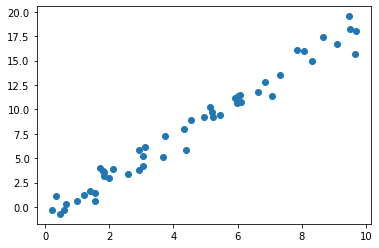

In [0]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [0]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [0]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.coef_

array([1.9776566])

In [0]:
model.intercept_

-0.9033107255311146

# Pandas  Examples


In [0]:

import pandas as pd
import numpy as np

In [0]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser


0    6
1    3
2    7
3    4
dtype: int64

In [0]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [0]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1,7,5,1
1,4,0,9,5
2,8,0,9,2


If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object *with the indices preserved:*

In [0]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

Or, for a slightly more complex calculation:

In [0]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,7.071068e-01,-0.707107,-0.707107,0.707107
1,1.224647e-16,0.000000,0.707107,-0.707107
2,-2.449294e-16,0.000000,0.707107,1.000000


### Index alignment in Series

As an example, suppose we are combining two different data sources, and find only the top three US states by *area* and the top three US states by *population*:

In [0]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [0]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [0]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [0]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using NaN values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators.
For example, calling ``A.add(B)`` is equivalent to calling ``A + B``, but allows optional explicit specification of the fill value for any elements in ``A`` or ``B`` that might be missing:

In [0]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index alignment in DataFrame

A similar type of alignment takes place for *both* columns and indices when performing operations on ``DataFrame``s:

In [0]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,11,19
1,2,4


In [0]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,2,6,4
1,8,6,1
2,3,8,1


In [0]:
A + B

,A,B,C
0,17.0,21.0,NaN
1,8.0,12.0,NaN
2,NaN,NaN,NaN


In [0]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,17.0,21.0,13.0
1,8.0,12.0,10.0
2,17.0,12.0,10.0


The following table lists Python operators and their equivalent Pandas object methods:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


In [0]:
A = rng.randint(10, size=(3, 4))
A

array([[9, 8, 9, 4],
       [1, 3, 6, 7],
       [2, 0, 3, 1]])

In [0]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-8, -5, -3,  3],
       [-7, -8, -6, -3]])

In [0]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-8,-5,-3,3
2,-7,-8,-6,-3


If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the ``axis`` keyword:

In [0]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,1,0,1,-4
1,-2,0,3,4
2,2,0,3,1


Note that these ``DataFrame``/``Series`` operations, like the operations discussed above, will automatically align  indices between the two elements:

In [0]:
halfrow = df.iloc[0, ::2]
halfrow

Q    9
S    9
Name: 0, dtype: int64

In [0]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-8.0,NaN,-3.0,NaN
2,-7.0,NaN,-6.0,NaN
